In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
print(bostonDF.shape)
bostonDF.head()

C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


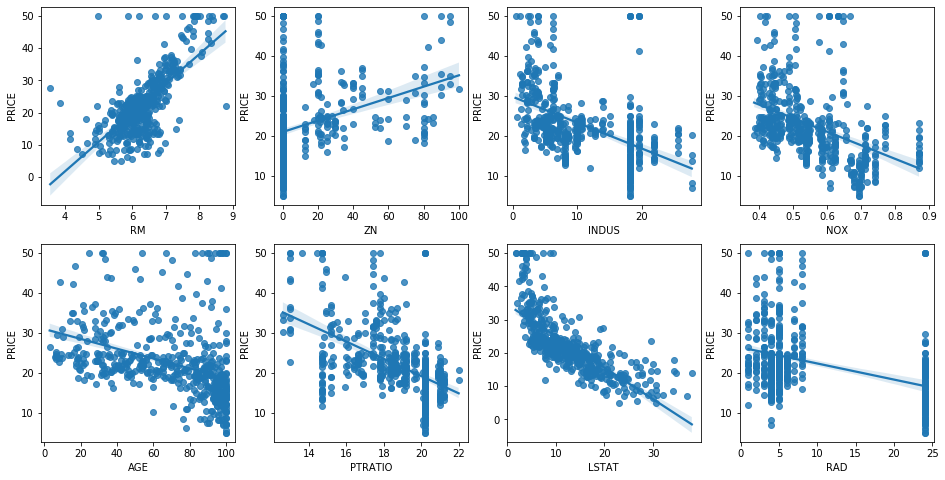

In [4]:
fig,axs = plt.subplots(2,4,figsize=(16,8))
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
x_data = bostonDF.drop('PRICE',axis=1,inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target,test_size=.3,random_state=156)
lr = LinearRegression()
lr.fit(x_train,y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {:.3f} , RMSE {:.3f}'.format(mse,rmse))
print('Variance Score : {:.3f}'.format(r2_score(y_test,y_preds)))


MSE : 17.297 , RMSE 4.159
Variance Score : 0.757


In [10]:
print(lr.intercept_)
print(lr.coef_)

40.995595172164336
[-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


In [15]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=x_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [18]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr,x_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(np.round(neg_mse_scores,2))
print(np.round(rmse_scores,2))
print(avg_rmse)


[-12.46 -26.05 -33.07 -80.76 -33.31]
[3.53 5.1  5.75 8.99 5.77]
5.828658946215808


In [20]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.arange(4).reshape(2,2)
print(x) # x1 x1
poly = PolynomialFeatures(degree = 2)
poly.fit(x)
poly_ftr = poly.transform(x)
print(poly_ftr) # 1 x1 x2 x1^2  x1x2  x2^2

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(x):
    y = 1 + 2*x+ x**2 + x**3
    return y

model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
x = np.arange(4).reshape(2,2)
y = polynomial_func(x)

model = model.fit(x,y)
print(np.round(model.named_steps['linear'].coef_,2))

[[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

def true_fun(x):
    return np.cos(1.5*np.pi*x)
np.random.seed(0)
n_samples=30
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.rand(n_samples)*0.1


Degree 1 Regression coef : [-1.52]
Degree 1 MSE : 0.3855980524675215

Degree 4 Regression coef : [  1.74 -22.98  31.58 -11.24]
Degree 4 MSE : 0.005719308263122045

Degree 15 Regression coef : [ 1.20140000e+02 -3.59872000e+03  5.21446800e+04 -4.14476860e+05
  1.80868799e+06 -3.37992441e+06 -6.02684726e+06  5.58440800e+07
 -1.69827424e+08  3.08630277e+08 -3.68966916e+08  2.93847846e+08
 -1.50696588e+08  4.51477248e+07 -6.01510532e+06]
Degree 15 MSE : 42905665.41783635


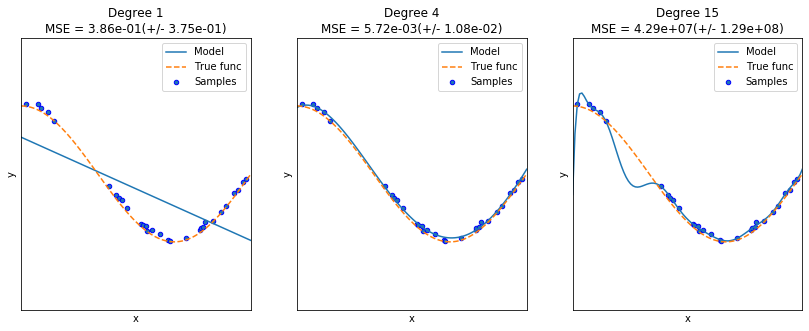

In [25]:
plt.figure(figsize=(14,5))
degrees = [1,4,15]
for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features",polynomial_features),("linear_regression",
                                                                      linear_regression)])
    pipeline.fit(x.reshape(-1,1),y)
    
    scores = cross_val_score(pipeline,x.reshape(-1,1),y,scoring="neg_mean_squared_error",cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {} Regression coef : {}'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {} MSE : {}'.format(degrees[i],-1*np.mean(scores)))
    x_test = np.linspace(0,1,100)
    plt.plot(x_test,pipeline.predict(x_test[:,np.newaxis]),label="Model")
    plt.plot(x_test,true_fun(x_test),'--',label='True func')
    plt.scatter(x,y,edgecolors='b',s=20,label="Samples")
    plt.xlabel("x");plt.ylabel("y");plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i],-scores.mean(),scores.std()))
plt.show()

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha = 129)
neg_mse_scores = cross_val_score(ridge,x_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[-13.10234559 -27.83207338 -35.99595424 -50.51808901 -21.42707057]
[3.61971623 5.27561119 5.99966284 7.10760783 4.62893838]
5.32630729441141


In [58]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name,params=None, x_data_n = None, y_target_n = None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######',model_name,'######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'ElasticNet' : model = ElasticNet(alpha=param,l1_ratio=0.7)
        elif model_name == 'Lasso' : model = Lasso(alpha = param)
        neg_mse_scores = cross_val_score(model,x_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('Alpha {} - RMSE : {:.3f}'.format(param,avg_rmse))
        model.fit(x_data,y_target)
        coeff = pd.Series(data=model.coef_,index=x_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df
        

In [59]:
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,x_data_n = x_data,y_target_n = y_target)

###### Lasso ######
Alpha 0.07 - RMSE : 5.612
Alpha 0.1 - RMSE : 5.615
Alpha 0.5 - RMSE : 5.669
Alpha 1 - RMSE : 5.776
Alpha 3 - RMSE : 6.189


In [61]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
def get_scaled_data(method = 'None', p_degree=None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias = False).fit_transform(scaled_data)
    return scaled_data

In [62]:
alphas = [0.1, 1, 10, 100]
scale_methods = [(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None),
               ('Log',2)]
for scale_method in scale_methods:
    x_data_scaled =get_scaled_data(method=scale_method[0],p_degree=scale_method[1],input_data=x_data)
    print('\n##{}## Polynomial degree : {}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas,x_data_n = x_data_scaled,y_target_n=y_target,verbose=True)


##None## Polynomial degree : None
###### Ridge ######
Alpha 0.1 - RMSE : 5.788
Alpha 1 - RMSE : 5.653
Alpha 10 - RMSE : 5.518
Alpha 100 - RMSE : 5.330

##Standard## Polynomial degree : None
###### Ridge ######
Alpha 0.1 - RMSE : 5.826
Alpha 1 - RMSE : 5.803
Alpha 10 - RMSE : 5.637
Alpha 100 - RMSE : 5.421

##Standard## Polynomial degree : 2
###### Ridge ######
Alpha 0.1 - RMSE : 8.827
Alpha 1 - RMSE : 6.871
Alpha 10 - RMSE : 5.485
Alpha 100 - RMSE : 4.634

##MinMax## Polynomial degree : None
###### Ridge ######
Alpha 0.1 - RMSE : 5.764
Alpha 1 - RMSE : 5.465
Alpha 10 - RMSE : 5.754
Alpha 100 - RMSE : 7.635

##MinMax## Polynomial degree : 2
###### Ridge ######
Alpha 0.1 - RMSE : 5.298
Alpha 1 - RMSE : 4.323
Alpha 10 - RMSE : 5.185
Alpha 100 - RMSE : 6.538

##Log## Polynomial degree : None
###### Ridge ######
Alpha 0.1 - RMSE : 4.770
Alpha 1 - RMSE : 4.676
Alpha 10 - RMSE : 4.836
Alpha 100 - RMSE : 6.241

##Log## Polynomial degree : 2
###### Ridge ######
Alpha 0.1 - RMSE : 9.547
Alpha 1

In [64]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
x_train,x_test,y_train,y_test = train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0)
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_preds = lr_clf.predict(x_test)
print(accuracy_score(lr_preds,y_test))
print(roc_auc_score(lr_preds,y_test))


0.9766081871345029
0.9781669150521609


In [67]:
from sklearn.model_selection import GridSearchCV
params = {'penalty':['l2','l1'],'C':[0.01,0.1,1,2,5,10]}
grid_clf = GridSearchCV(lr_clf,param_grid= params,scoring='accuracy',cv=5)
grid_clf.fit(data_scaled,cancer.target)
print(grid_clf.best_score_)
print(grid_clf.best_params_)


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFaile

0.9806862288464524
{'C': 1, 'penalty': 'l2'}


In [68]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf,x_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(neg_mse_scores)
print(rmse_scores)
print(avg_rmse)

[ -7.93301384 -13.05843666 -20.52781638 -46.30574382 -18.80079393]
[2.81656064 3.6136459  4.53076333 6.80483239 4.33598823]
4.420358097543781


In [90]:
x_data.dtypes!='float32'

CRIM       True
ZN         True
INDUS      True
CHAS       True
NOX        True
RM         True
AGE        True
DIS        True
RAD        True
TAX        True
PTRATIO    True
B          True
LSTAT      True
K          True
dtype: bool